## Connect to the Northwind dataset using SQL

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [65]:
import psycopg2 #Loand Module into current namespace

#define connection string specifing the server, the database, the user and the password
constr =  "host='dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com' dbname='northwind' user='dsi_student' password = 'gastudents'"

#Use the connection string to establish a connection to the server. The return type is of type SQLConnection
conn = psycopg2.connect(constr)

#Create a Curser Instance using the connection
cursor = conn.cursor()

#Use the cursor to execute a query
cursor.execute('SELECT * FROM ORDERS')

#Fetch the results of the query if it exsitst
records = cursor.fetchall()

print records

[(10248, 'VINET', 5, datetime.date(1996, 7, 4), datetime.date(1996, 8, 1), datetime.date(1996, 7, 16), 3, 32.38, 'Vins et alcools Chevalier', "59 rue de l'Abbaye", 'Reims', None, '51100', 'France'), (10249, 'TOMSP', 6, datetime.date(1996, 7, 5), datetime.date(1996, 8, 16), datetime.date(1996, 7, 10), 1, 11.61, 'Toms Spezialit\xc3\xa4ten', 'Luisenstr. 48', 'M\xc3\xbcnster', None, '44087', 'Germany'), (10250, 'HANAR', 4, datetime.date(1996, 7, 8), datetime.date(1996, 8, 5), datetime.date(1996, 7, 12), 2, 65.83, 'Hanari Carnes', 'Rua do Pa\xc3\xa7o, 67', 'Rio de Janeiro', 'RJ', '05454-876', 'Brazil'), (10251, 'VICTE', 3, datetime.date(1996, 7, 8), datetime.date(1996, 8, 5), datetime.date(1996, 7, 15), 1, 41.34, 'Victuailles en stock', '2, rue du Commerce', 'Lyon', None, '69004', 'France'), (10252, 'SUPRD', 4, datetime.date(1996, 7, 9), datetime.date(1996, 8, 6), datetime.date(1996, 7, 11), 2, 51.3, 'Supr\xc3\xaames d\xc3\xa9lices', 'Boulevard Tirou, 255', 'Charleroi', None, 'B-6000', 'Bel

In [66]:
cursor.execute('SELECT * FROM ORDER_DETAILS')

#Fetch the results of the query if it exsitst
records2 = cursor.fetchall()

print records2

[(10248, 11, 14.0, 12, 0.0), (10248, 42, 9.8, 10, 0.0), (10248, 72, 34.8, 5, 0.0), (10249, 14, 18.6, 9, 0.0), (10249, 51, 42.4, 40, 0.0), (10250, 41, 7.7, 10, 0.0), (10250, 51, 42.4, 35, 0.15), (10250, 65, 16.8, 15, 0.15), (10251, 22, 16.8, 6, 0.05), (10251, 57, 15.6, 15, 0.05), (10251, 65, 16.8, 20, 0.0), (10252, 20, 64.8, 40, 0.05), (10252, 33, 2.0, 25, 0.05), (10252, 60, 27.2, 40, 0.0), (10253, 31, 10.0, 20, 0.0), (10253, 39, 14.4, 42, 0.0), (10253, 49, 16.0, 40, 0.0), (10254, 24, 3.6, 15, 0.15), (10254, 55, 19.2, 21, 0.15), (10254, 74, 8.0, 21, 0.0), (10255, 2, 15.2, 20, 0.0), (10255, 16, 13.9, 35, 0.0), (10255, 36, 15.2, 25, 0.0), (10255, 59, 44.0, 30, 0.0), (10256, 53, 26.2, 15, 0.0), (10256, 77, 10.4, 12, 0.0), (10257, 27, 35.1, 25, 0.0), (10257, 39, 14.4, 6, 0.0), (10257, 77, 10.4, 15, 0.0), (10258, 2, 15.2, 50, 0.2), (10258, 5, 17.0, 65, 0.2), (10258, 32, 25.6, 6, 0.2), (10259, 21, 8.0, 10, 0.0), (10259, 37, 20.8, 1, 0.0), (10260, 41, 7.7, 16, 0.25), (10260, 57, 15.6, 50, 0.0)

## Create a pandas df that is the combination of the orders and order_details tables
Each row of your df represents a unique order / product pair.  You could either bring in the tables separately, and join in pandas, or join in SQL, and bring in one table.  Ideally you should try both ways to practice!

In [67]:
import pandas as pd
orders = pd.read_sql('Select * from orders;', conn)
order_details = pd.read_sql('Select * from order_details;', conn)
order_details.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [68]:
om = orders.merge(order_details)
om

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,Discount
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,11,14.00,12,0.00
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,42,9.80,10,0.00
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,72,34.80,5,0.00
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,14,18.60,9,0.00
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,51,42.40,40,0.00
5,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,41,7.70,10,0.00
6,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,51,42.40,35,0.15
7,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,65,16.80,15,0.15
8,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,22,16.80,6,0.05
9,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,57,15.60,15,0.05


## Explore the data!  Convert data types as appropriate, calculate new variables, do some exploratory analysis with pivot_tables and plotting
You can treat this as an open-ended assignment, and decide what you want to explore, or you can answer the questions below.

In [69]:
om['Rough_Total'] = om['UnitPrice']*om['Quantity']*(1-om['Discount'])
om

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductID,UnitPrice,Quantity,Discount,Rough_Total
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,11,14.00,12,0.00,168.0000
1,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,42,9.80,10,0.00,98.0000
2,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France,72,34.80,5,0.00,174.0000
3,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,14,18.60,9,0.00,167.4000
4,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany,51,42.40,40,0.00,1696.0000
5,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,41,7.70,10,0.00,77.0000
6,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,51,42.40,35,0.15,1261.4000
7,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,65,16.80,15,0.15,214.2000
8,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,22,16.80,6,0.05,95.7600
9,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France,57,15.60,15,0.05,222.3000


### 1)  Which employee had the highest total revenues?  Plot a bar chart to show this.

            Rough_Total
EmployeeID             
1            556.833636
2            691.028029
3            631.815710
4            554.502014
5            587.968226
6            439.959104
7            707.774063
8            487.931837
9            722.505294


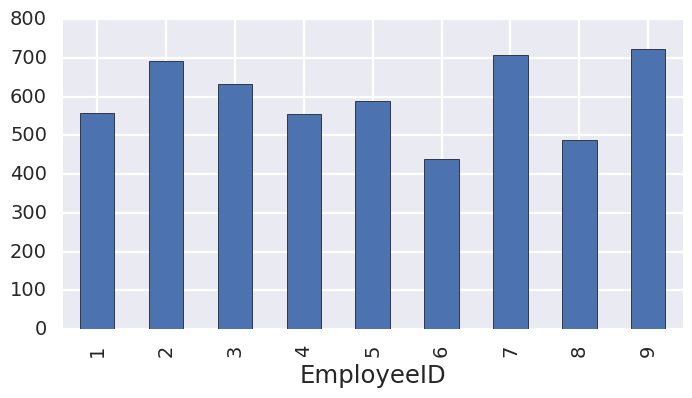

In [72]:
ET = pd.pivot_table(om, index = ['EmployeeID'], values = ['Rough_Total'])
print ET
ET['Rough_Total'].plot(kind='bar', figsize=(8,4), fontsize=14) 

### Challenge: create a scatter plot of unit price / quantity and colour-code by employee

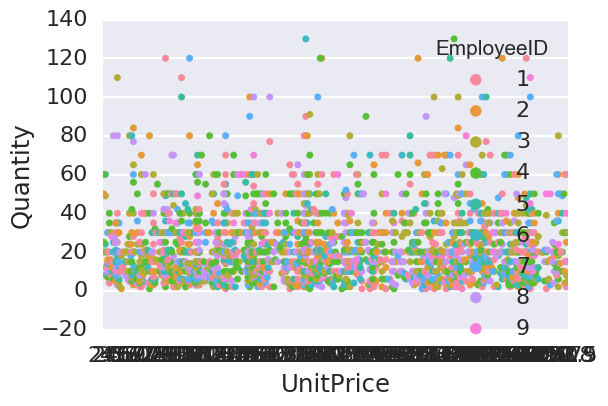

In [73]:
#om.plot(x='UnitPrice', y='Quantity', kind='scatter', color= 'random' for x in om["EmployeeID"] , figsize=(15,7), s=25)

import seaborn as sns
sns.swarmplot(x="UnitPrice", y="Quantity", data=om, hue="EmployeeID", size=5)

1996

### 2) Calculate and plot the total volume of products shipped by month

In [82]:
type(om['ShippedDate'][10])
pd.pivot_table(om, index = 'ShippedDate', values = 'Quantity', aggfunc = sum)

#om.plot(kind='bar', index = ['ShippedDate'], values = ['Quantity'], figsize=(8,4), fontsize=14)

ShippedDate
1996-07-10     49
1996-07-11    105
1996-07-12     60
1996-07-15    151
1996-07-16    129
1996-07-17     27
1996-07-22     46
1996-07-23    178
1996-07-25     40
1996-07-29    102
1996-07-30     40
1996-07-31    196
1996-08-02     69
1996-08-06    205
1996-08-09     98
1996-08-12    202
1996-08-13     32
1996-08-14     25
1996-08-16    106
1996-08-21     19
1996-08-23    136
1996-08-26    121
1996-08-27     61
1996-08-28    114
1996-08-30    164
1996-09-02     20
1996-09-03     73
1996-09-04     46
1996-09-05     75
1996-09-10     84
             ... 
1998-03-26     15
1998-03-27    156
1998-03-30     91
1998-03-31    207
1998-04-01     64
1998-04-02    264
1998-04-03    147
1998-04-06    209
1998-04-07    487
1998-04-08    205
1998-04-09     18
1998-04-10    458
1998-04-13    235
1998-04-14    201
1998-04-15     38
1998-04-16    194
1998-04-17    255
1998-04-20    374
1998-04-21    268
1998-04-22     96
1998-04-23    272
1998-04-24    449
1998-04-27    399
1998-04-28     7

### 3) Calculate and plot a histogram of the number of days taken to ship

TypeError: cannot concatenate 'str' and 'float' objects

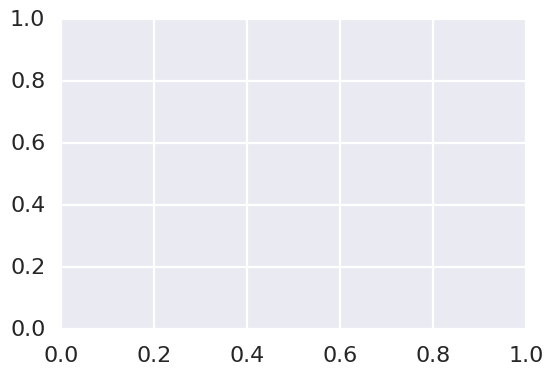

In [117]:
om['ShipLag'] = om['ShippedDate'] - om['OrderDate']
om['ShipLag'] = om['ShipLag'].replace('Nat', 0)
pd.Series('ShipLag').hist()
#df['Total_Funding'] = df['Total_Funding'].astype(int)



### Challenge: compare the distributions for USA and UK on one plot

### 4) Plot the daily revenues over time (by Order Date)

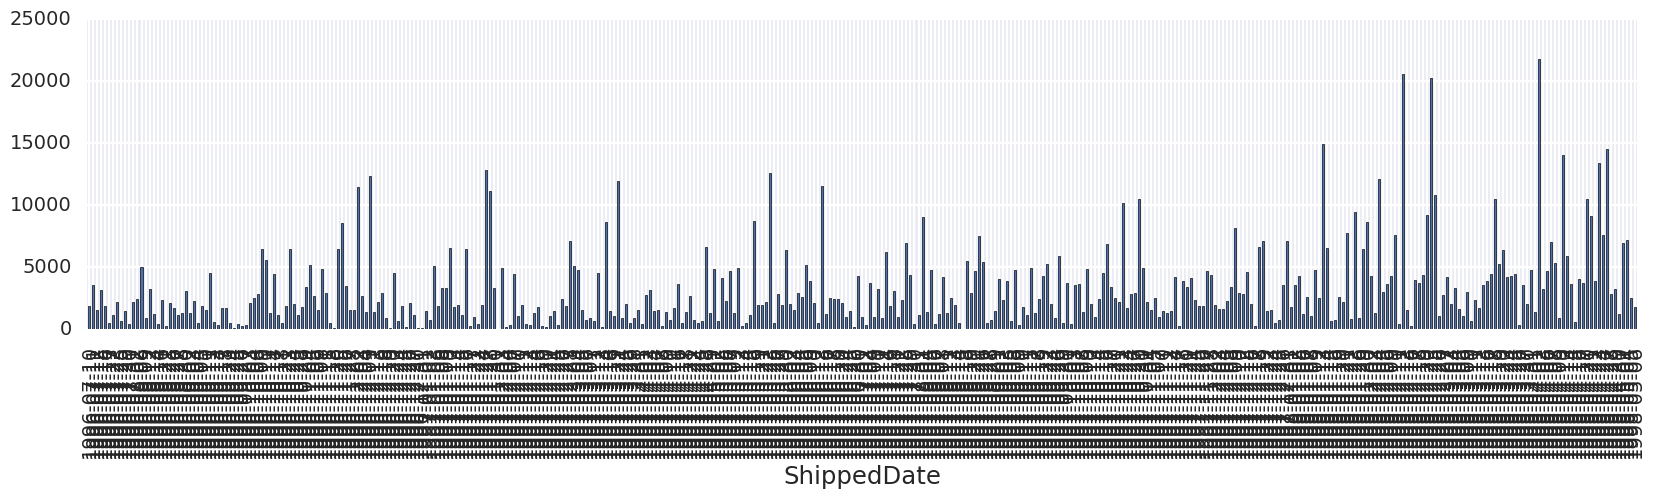

In [99]:
dailySales = pd.pivot_table(om, index = 'ShippedDate', values = 'Rough_Total', aggfunc = sum)
dailySales.plot(kind='bar', figsize=(20,4), fontsize=14)